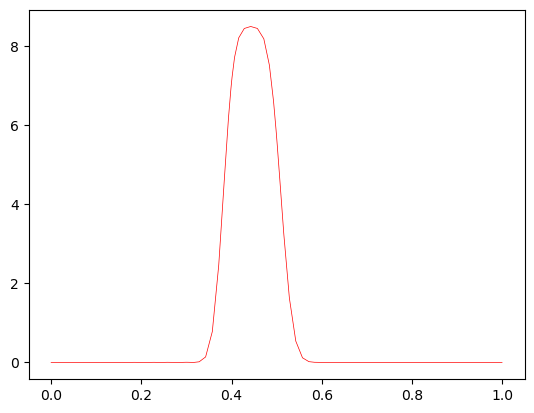

In [9]:
import matplotlib.pyplot as plt
from stlc import lkm


def run_simulation():
    zl = 1.0
    epsilon = 0.4
    u = 0.29
    tmax = 20
    a = 0.85
    D = 1e-6
    k = 111.0
    c_0 = 10.0
    b = 1.0

    parameters0 = lkm.ModelParameters(u=u, ep=epsilon, D=D, c0=c_0, k=k, a=a, b=b, ip = lambda t: t<1.)

    n = 10
    ne = 10
    dt = 0.001
    timesteps = int(tmax / dt)
    model = lkm.LumpedKineticModel(n, ne, zl, [parameters0])
    y_fem = lkm.solve(model, tmax, dt)
    result = y_fem[model.q_idx : model.q_end, int(timesteps / 5)]
    fig, ax = plt.subplots()
    ax.plot(model.zs, result, f"r-", linewidth=0.5, label=f"stlc")
    fig.savefig("single_component.pdf")


if __name__ == "__main__":
    run_simulation()

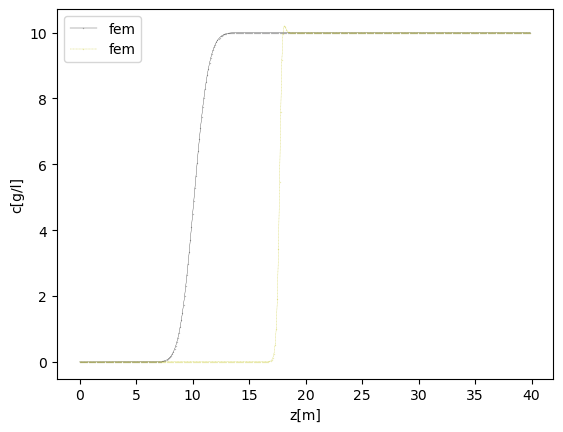

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from stlc import lkm

k = 1e3
epsilon = 0.4
D = 1e-5
u = .1
tmax = 40
a_0 = 0
a_1 = 1
b_0 = 0.0
b_1 = 0.1
c0_0 = 10
c0_1 = 10


def step(t: float, x0: float, x1: float):
    return float(t > x0 and t < x1)


# Build a parameter object for each component
parameters0 = lkm.ModelParameters(u=u,
                                  ep=epsilon,
                                  D=D,
                                  c0=c0_0,
                                  k=k,
                                  a=a_0,
                                  b=b_0,
                                  ip=lambda t: step(t, 0, 40))

parameters1 = lkm.ModelParameters(u=u,
                                  ep=epsilon,
                                  D=D,
                                  c0=c0_1,
                                  k=k,
                                  a=a_1,
                                  b=b_1,
                                  ip=lambda t: step(t, 0, 40))

n = 10
ne = 40
zl = 1.
dt = 0.1
timesteps = int(tmax / dt)

total_points = ne * (n + 2 - 1) + 1 - 2
plt.figure()

model_fem = lkm.LumpedKineticModel(n, ne, zl, [parameters0, parameters1])

y_fem = lkm.solve(model_fem, tmax, dt)
plt.plot(np.arange(timesteps) * dt,
         y_fem[model_fem.c_end - 1],
         'k-+',
         label='fem',
         markersize=0.1,
         linewidth=0.2)
plt.plot(np.arange(timesteps) * dt,
         y_fem[model_fem.q_end + model_fem.c_end - 1],
         'y--+',
         label='fem',
         markersize=0.1,
         linewidth=0.2)

plt.legend()
plt.xlabel("z[m]")
plt.ylabel("c[g/l]")
plt.savefig("lkm_multi.pdf")

